# Python libraries - Numpy, matplotlib

* Numpy array
* indexing difference vs nested list
* dtype of numpy array
* .shape

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
# this creates data X, y. Both are numpy arrays.
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=3,
                  random_state=1,
                  center_box = (-10,10))
make_blobs()

# Numpy-style slicing and indexing

* dimensions
* single elements selection (and -values)
* list indexing
* slicing
* logical indexing

In [ ]:
# Notes:
# and = &  r-alt + c
# or = |   r-alt + w
# not = ~  r-alt + 1 (vlevo nahoře)

* np.shape, np.dtype
* np.mean() / np.sum() / np.max() ... with various axis argument
* np.eye(), np.zeros()
* np.random.random() to create your own matrix, make the range from 0 to 10 and make it square.
* Try too add a number, multiply by a number, etc.
* Transpose the matrix from 4.
* Do an inverse of the matrix from 4.

## <font color=orange>TASK</font>  (+-15 min)

**Having X and y, achieve following tasks:**

1. **Get only datapoints (rows) of first cluster**
2. **Get only datapoins that belong to first or third cluster**
3. **Get only datapoints that have x1 (first column) coordinate > 0 and x2 (second column) coordinate < 3**
4. **Write code that prints out mean for each dimension for each cluster (HINT: look for numpy mean)**
5. (Sandbox) experiment with logical indexing or plotting the data using matplotlib. Can you display the data so that each cluster will have its own color? (Hint - scatterplot)

## Introducing matplotlib

https://matplotlib.org/3.1.1/gallery/index.html

- simple scatter plot, parameters

## <font color=orange>TASK</font> (+-15 min)

**Plot distributions of data points per cluster for one selected dimension e.g. x["select rows for individual cluster", 0]. The result will be one plot containing three distributions (one per cluster).**

Hint: for cycle is required. Plots are added to one canvas until plot.show() is called.

# Pandas

Standard for manipulating data in the data science workflow. https://pandas.pydata.org/.

1. Slicing, indexing, index, filtering - DataFrame.loc/iloc
2. dtypes, underlaying numpy (.values)
3. Key objects - Series vs DataFrame - pd.read_csv(), pd.read_excel(), pd.from_pickle()
4. describe (+ pandas-profiling https://miro.medium.com/max/4052/1*48uRp4eMwtQgb4raZRRAtA.gif)
5. head/tail
6. shape, dtypes
7. Creating new columns.
8. Renaming columns.
9. Capitalizing name and columns.str.xxx (+ column.dt.yyy)
10. Casting columns

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [ ]:
import seaborn as sns
df = sns.load_dataset("mpg")
df.head()



## <font color=orange>TASK (+-20 min) </font>

Given the dataset:

1. Select only cars from from usa with weight > 4000 (.loc and logical indexing)
2. Show mean mpg and horsepower of cars per origin and model year and sort values by horsepower descending (groupby, reset_index, mean, sort_values)
3. Replace values in column origin equal to 'usa' with 'U.S.A. (logical indexing and filtering)
4. Show only rows containing missing values (isnull, any)
5. (Optional) Create aggregations for the table -> group by origin -> max acceleration, min and max model_year, average weight. (Look at Named Aggregations)

# <span style="color:orange">Hands-on: histogram equalization</span> (https://www.youtube.com/watch?v=PD5d7EKYLcA)
## Import necessary packages and load image
1. The image should either be a path to a file or url to a !.png image.
2. Select whatever image you like, ideally if it is in grayscale

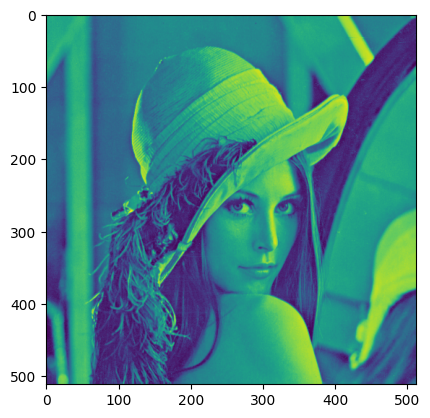

In [47]:
from skimage import io
import matplotlib.pyplot as plt

# Put the lena image in your environment and load it
image = io.imread(r"lena.png")
image = image / image.max() * 255
image = image.round()
image.shape
plt.imshow(image)

## Logical indexing

1. Copy the image into new variable (.copy())
2. For all pixels having value above 150, replace the value to 255
3. Display the result

## Show the histogram of intensity values

1. copy the original image
2. plot histogram using matplotlib with at least 100 bins (plt.hist(...)) (Hint: function flatten of nparray object can come in handy)
3. Change the x limits to span over 0-255 (plt.xlim(...))
4. Add title and labels to the plots (plt.title(...), plt.xlabel(...), plt.ylabel(...), ...)
5. (Optional) Change the style of the bar plot, colors, outlines, ...

## Create your own probability distribution function (normalized histogram)  function which will return a list of elements (our case 256)
1. Function will have arguments - image (2D array) and return a list of 256 values where each position determines how many pixels are there with the current position. I.E. iterate through all the possible intensity values and count n pixels with that intensity.
2. **(What can really help you is the fact that you can sum (np.sum) over boolean values as True = 1 and False = 0)**
2. check whether the number of pixels is the same (.shape attribute)
2. Try the function on the image and plot the result (with plt.plot()) to see whether it is the same.
3. Add title and labels to the plot

## Implement function which will transform the output of your histogram into cumulattive distribution function
 $s_k = \sum_{j=0}^{k} {\frac{n_j}{N}}$ where $j$, $k$ are intensity values and $N$ is the total number of pixels and $s_k$ is the value of the cdf

 1. The function will return an array with values of the cdf (array will have length 256)
 2. Plot the result by plt.plot() to see it makes sense - the y values should start at 0 and end at 1 in order to be a valid cdf function

## Make the transformation
1. The intensity transformation in the simplest form is that pixel with value $p$ in the original image will have now intensity $255*cdf(p)$. Do not forget to either cast the result to integer or round it (round()) (Logical indexing + loops will help you)!
2. Display minimal and maximal value of the image (np.max(), np.min())
3. Show the transformed image

## Plot the histogram and cummulative density function of the transformed image